In [120]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Mai 30

@author: yaning
"""

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
np.set_printoptions(threshold=np.inf)
from scipy.ndimage import rotate

In [121]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [122]:
# pick some numbers, rotate and train 1, for different number 2
one = x_train[23]
two = x_train[25]

In [124]:
y_train[23]

np.uint8(1)

In [125]:
one.shape

(28, 28, 1)

In [126]:
# make them binary
binary_one = np.where(one != 0, 1, 0)
binary_two = np.where(two != 0, 1, 0)

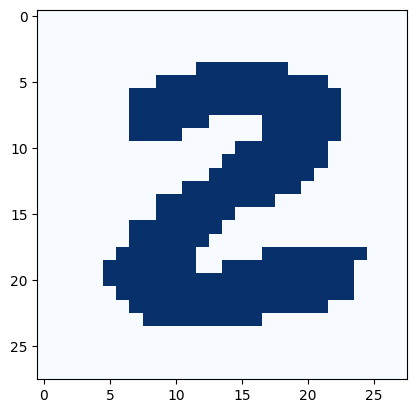

In [128]:
plt.imshow(binary_two, cmap='Blues')

In [211]:
angle_rotate = 20
num_rotate = 10

In [212]:
rotate_dataset = []
for i in range(num_rotate):
    rotate_dataset.append(rotate(binary_one, i*angle_rotate, reshape=False))

In [213]:
rotate_dataset = np.array(rotate_dataset)

In [214]:
rotate_dataset.shape

(10, 28, 28, 1)

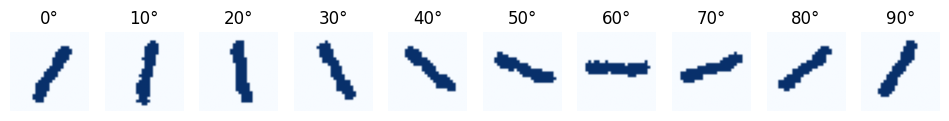

In [215]:
plt.figure(figsize=(12,3))
for i in range(num_rotate):
    plt.subplot(1,10,i+1)
    plt.imshow(rotate_dataset[i], cmap='Blues')
    plt.title(f"{int(10*i)}°")
    plt.axis('off')
plt.show()

In [216]:
rotate_dataset.shape

(10, 28, 28, 1)

In [217]:
rotate_dataset = rotate_dataset[:3]

In [218]:
# form an shape (5000, 3) array with 5000 time points and 3 input neurons
# every fire is 45-50 cycles, 
pointCount = 6000
start_tstep = 500
# one_cycle = np.concatenate((np.ones(45, dtype=bool), np.zeros(189, dtype=bool)))
one_cycle = np.ones(234)
firing_duration = 45+189
# 23*(45+189) = 5382
total_time = 5382


non_fire_array = np.zeros(pointCount, dtype=bool)

fire_seq = np.tile(one_cycle, 23)
fire_array = non_fire_array.copy()
fire_array[start_tstep:start_tstep+len(fire_seq)] = fire_seq

In [219]:
fire_data = np.zeros((3,28,28,1500), dtype=bool)
for i in range(rotate_dataset.shape[0]):
    for x in range(rotate_dataset.shape[1]):
        for y in range(rotate_dataset.shape[2]):
            if rotate_dataset[i,x,y] == 0:
                fire_data[i,x,y] = non_fire_array[:1500]
            else:
                fire_data[i,x,y] = fire_array[:1500]

In [220]:
arr_reordered = fire_data.transpose(1, 2, 0, 3)

# Merge (10,6000) -> 60000
result = arr_reordered.reshape(28, 28, 3 * 1500)

In [221]:
result.shape

(28, 28, 4500)

In [222]:
import pickle
path = "/home/yaning/Documents/"

with open(path + "fire_data_rotate.pkl", "wb") as f:
    pickle.dump(result, f)